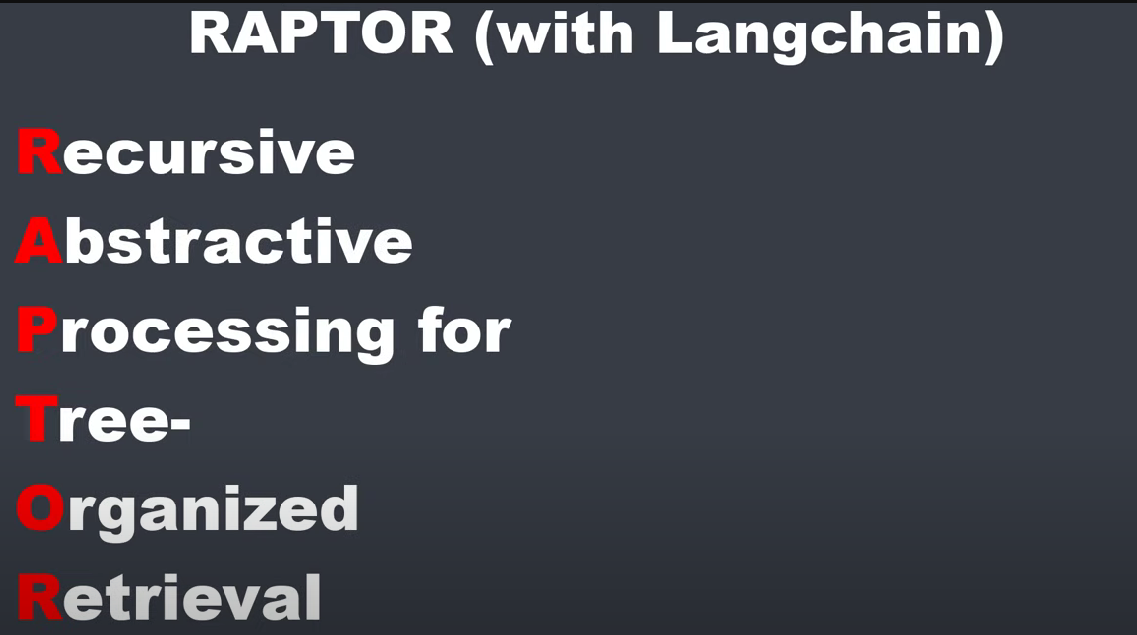

Paper: https://arxiv.org/html/2401.18059v1

Video: https://www.youtube.com/watch?v=zfHQSr_s9PM

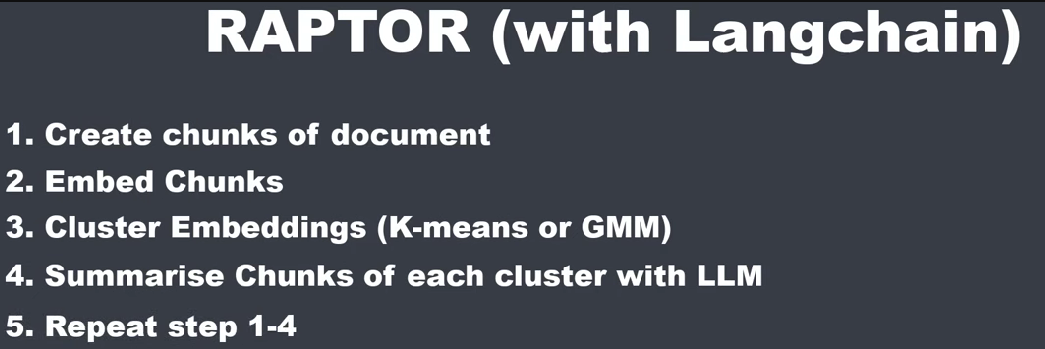

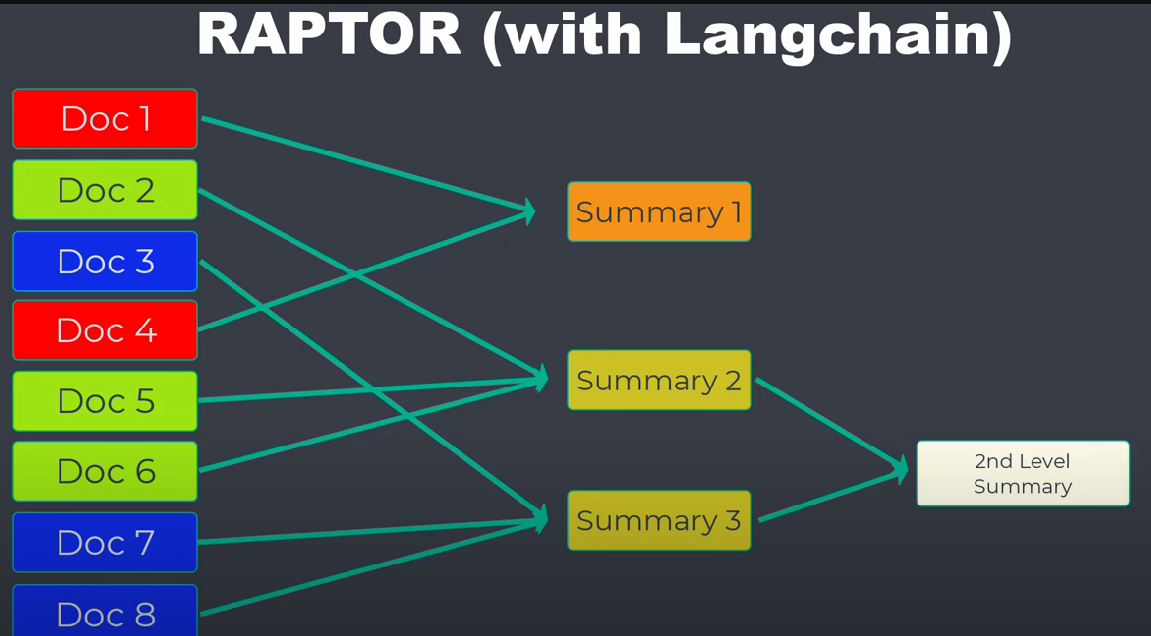

In [3]:
!pip install -q langchain langchain_core langchain_community langchain_text_splitters tiktoken langchain-google-genai umap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 975.5/975.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.4/337.4 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.9/163.9 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.3/718.3 kB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 13.7 MB/s eta 0:00:00


In [6]:
!pip install -q unstructured

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.7/274.7 kB 24.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.8/80.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.6 MB/s eta 0:00:00


In [4]:
from langchain_community.document_loaders import DirectoryLoader

In [7]:
loader = DirectoryLoader('/content/data', glob="**/*.txt")
docs = loader.load()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [8]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [9]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=200,
    chunk_overlap=20,
    length_function=len,
    is_separator_regex=False,
)

In [10]:
docs = text_splitter.split_documents(docs)
texts = [doc.page_content for doc in docs]

In [11]:
import tiktoken

def num_tokens_from_string(string: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding("cl100k_base")
    num_tokens = len(encoding.encode(string))
    return num_tokens

In [12]:
counts = [num_tokens_from_string(t) for t in texts]

<function matplotlib.pyplot.show(close=None, block=None)>

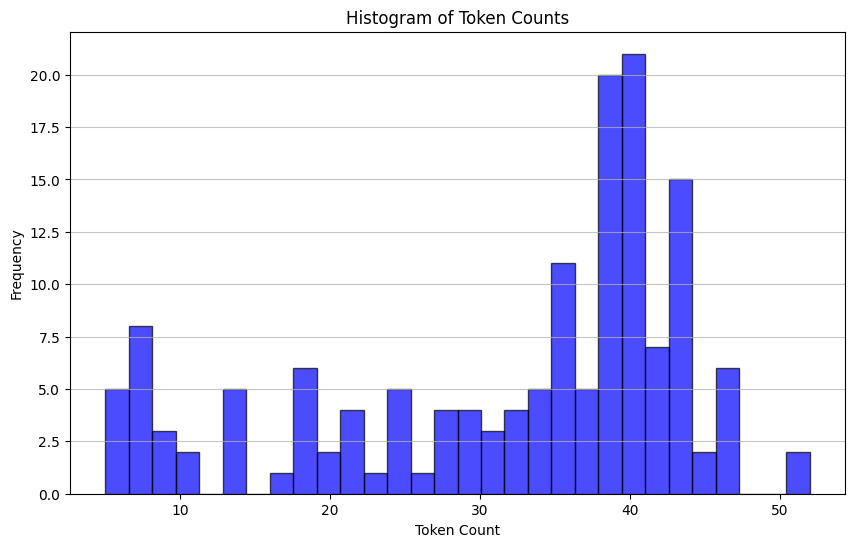

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(counts, bins=30, color="blue", edgecolor="black", alpha=0.7)
plt.title("Histogram of Token Counts")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)
plt.show

In [14]:
d_sorted = sorted(docs, key=lambda x: x.metadata["source"])
d_reversed = list(reversed(d_sorted))
concatenated_content = "\n\n\n --- \n\n\n".join(
    [doc.page_content for doc in d_reversed]
)
print(
    "Num tokens in all context: %s"
    % num_tokens_from_string(concatenated_content)
)

Num tokens in all context: 5250


In [15]:
import os
from google.colab import userdata

os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')

In [16]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings, ChatGoogleGenerativeAI

embedding_model = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
model = ChatGoogleGenerativeAI(temperature=0, model="gemini-1.5-pro")

In [17]:
global_embeddings = [embedding_model.embed_query(txt) for txt in texts]

In [18]:
global_embeddings[0]

[0.10429131239652634,
 0.023424575105309486,
 0.023842811584472656,
 0.05212727189064026,
 0.05486441031098366,
 0.047777485102415085,
 0.055628713220357895,
 0.019350258633494377,
 -0.003295019268989563,
 0.041252706199884415,
 0.043605491518974304,
 0.003762920154258609,
 0.010156682692468166,
 -0.04157554358243942,
 -0.0033457097597420216,
 0.017581433057785034,
 -0.01942598633468151,
 0.00565215153619647,
 -0.013488516211509705,
 -0.03648373857140541,
 0.05166766792535782,
 -0.025849873200058937,
 -0.034175239503383636,
 -0.10159476846456528,
 0.022449323907494545,
 0.027716349810361862,
 -0.02311253733932972,
 -0.04205268621444702,
 -0.012485790997743607,
 0.034396685659885406,
 -0.10159552842378616,
 0.044630952179431915,
 -0.05495598912239075,
 0.011780626140534878,
 0.029321951791644096,
 -0.034373193979263306,
 -0.002679812256246805,
 0.008242804557085037,
 0.0367790125310421,
 0.06965107470750809,
 0.03275623172521591,
 -0.002279134001582861,
 -0.05046367272734642,
 0.0114422

UMAP => Algo. for reducing the dimensions of the embeddings vectors from 1536 to only 2 dimensions but keep the semantic meaning as good as possible

In [20]:
!pip uninstall umap
!pip install -q umap-learn

Found existing installation: umap 0.1.1
Uninstalling umap-0.1.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/umap-0.1.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/umap/*
Proceed (Y/n)? Y
  Successfully uninstalled umap-0.1.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 900.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.9 MB/s eta 0:00:00


UMAP can be computationally expensive

In [21]:
import matplotlib.pyplot as plt
from typing import Optional
import numpy as np
import umap.umap_ as umap

def reduce_cluster_embeddings(
    embeddings: np.ndarray,
    dim: int,
    n_neighbors: Optional[int] = None,
    metric: str = "cosine",
) -> np.ndarray:
    if n_neighbors is None:
        n_neighbors = int((len(embeddings) - 1) ** 0.5)
    return umap.UMAP(
        n_neighbors=n_neighbors, n_components=dim, metric=metric
    ).fit_transform(embeddings)


dim = 2
global_embeddings_reduced = reduce_cluster_embeddings(global_embeddings, dim)
global_embeddings_reduced[0]



array([ 6.194089 , -2.1040602], dtype=float32)

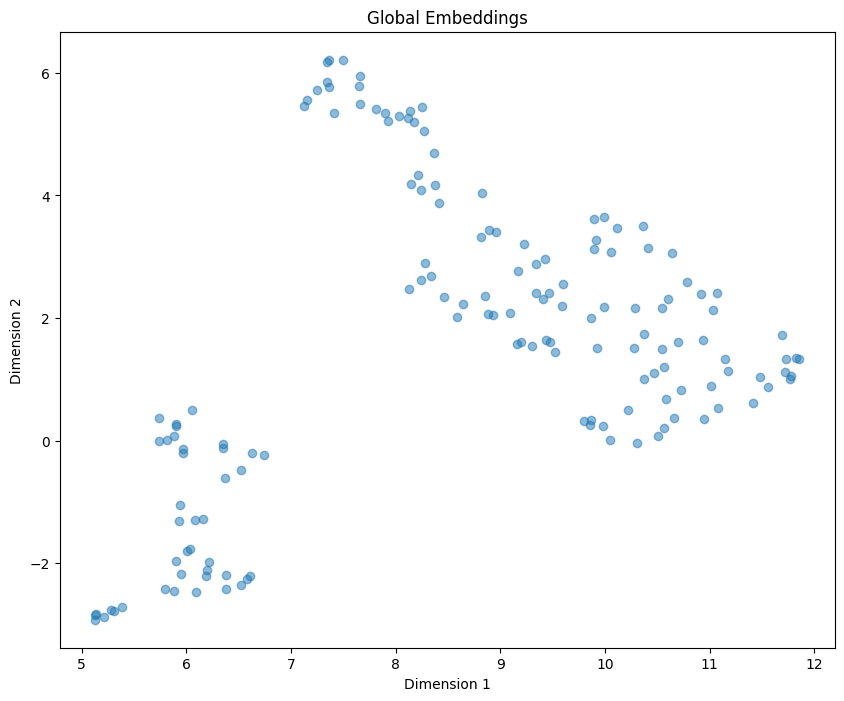

In [22]:
plt.figure(figsize=(10, 8))
plt.scatter(global_embeddings_reduced[:, 0], global_embeddings_reduced[:, 1], alpha=0.5)
plt.title("Global Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

def get_optimal_clusters(embeddings: np.ndarray, max_clusters: int = 50, random_state: int = 1234):
    max_clusters = min(max_clusters, len(embeddings))
    bics = [GaussianMixture(n_components=n, random_state=random_state).fit(embeddings).bic(embeddings)
            for n in range(1, max_clusters)]
    return np.argmin(bics) + 1

def gmm_clustering(embeddings: np.ndarray, threshold: float, random_state: int = 0):
    n_clusters = get_optimal_clusters(embeddings)
    gm = GaussianMixture(n_components=n_clusters, random_state=random_state).fit(embeddings)
    probs = gm.predict_proba(embeddings)
    labels = [np.where(prob > threshold)[0] for prob in probs]
    return labels, n_clusters

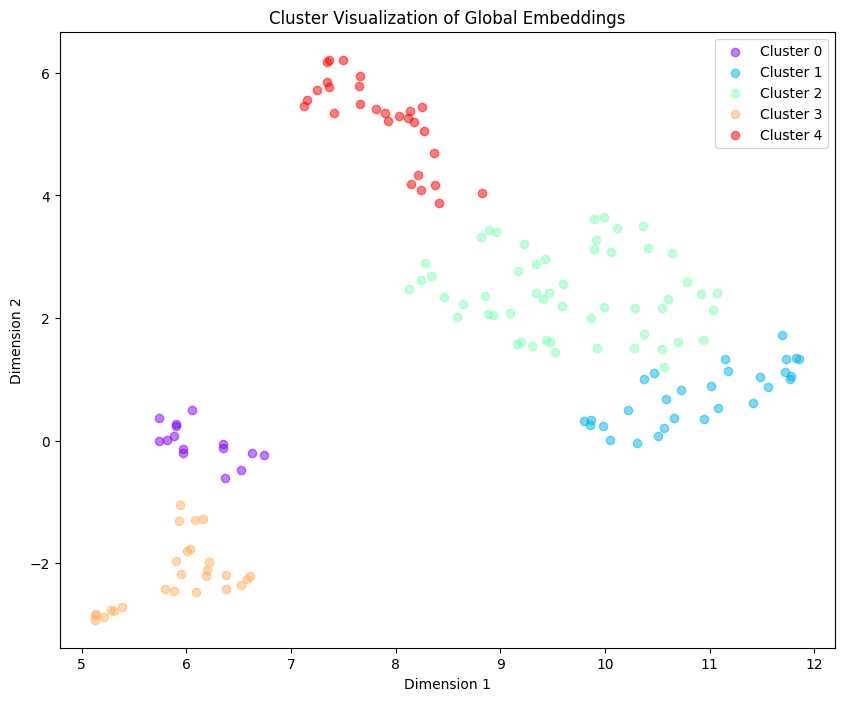

In [24]:
labels, _ = gmm_clustering(global_embeddings_reduced, threshold=0.5)

plot_labels = np.array([label[0] if len(label) > 0 else -1 for label in labels])
plt.figure(figsize=(10, 8))

unique_labels = np.unique(plot_labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    mask = plot_labels == label
    plt.scatter(global_embeddings_reduced[mask, 0], global_embeddings_reduced[mask, 1], color=color, label=f'Cluster {label}', alpha=0.5)

plt.title("Cluster Visualization of Global Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()

In [25]:
import pandas as pd

simple_labels = [label[0] if len(label) > 0 else -1 for label in labels]

df = pd.DataFrame({
    'Text': texts,
    'Embedding': list(global_embeddings_reduced),
    'Cluster': simple_labels
})
print(df.head(3))

                                                Text               Embedding  \
0  Introduction: Welcome to Bella Vista, where ev...  [6.194089, -2.1040602]   
1  of our culinary philosophy lies a deep reveren...   [9.897621, 3.1277208]   
2  art of transforming humble ingredients into ex...   [9.994378, 2.1732633]   

   Cluster  
0        3  
1        2  
2        2  


In [26]:
def format_cluster_texts(df):
    clustered_texts = {}
    for cluster in df['Cluster'].unique():
        cluster_texts = df[df['Cluster'] == cluster]['Text'].tolist()
        clustered_texts[cluster] = " --- ".join(cluster_texts)
    return clustered_texts

In [27]:
clustered_texts = format_cluster_texts(df)

In [28]:
clustered_texts

{3: "Introduction: Welcome to Bella Vista, where every dish is a love letter to the vibrant flavors, fresh ingredients, and time-honored traditions of Italian cuisine. At the heart of our culinary --- people who create it. At Bella Vista, we embrace this philosophy wholeheartedly, sourcing the finest seasonal ingredients from local farmers, fishermen, and artisans, and allowing their natural --- centuries. At Bella Vista, we take pride in our pasta-making traditions, crafting each batch of dough with care and precision to achieve the perfect texture and flavor. From silky strands of --- Chapter 4: From Field to Fork At Bella Vista, we believe that the quality of our ingredients is paramount to the success of our dishes, which is why we go to great lengths to source the freshest, --- elements. At Bella Vista, our chefs draw on a rich palette of ingredients and seasonings to create dishes that are as satisfying as they are memorable. From the zesty tang of citrus and the peppery --- been

In [29]:
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

template = """You are an assistant to create a detailed summary of the text input provided.
Text:
{text}
"""
prompt = ChatPromptTemplate.from_template(template)
chain = prompt | model | StrOutputParser()

In [30]:
summaries = {}
for cluster, text in clustered_texts.items():
    summary = chain.invoke({"text": text})
    summaries[cluster] = summary


In [31]:
summaries

{3: '## Bella Vista: A Culinary Love Letter to Italy \n\nThis text paints a vivid picture of Bella Vista, an Italian restaurant deeply rooted in tradition, passion, and the pursuit of culinary excellence. \n\n**The Heart of Bella Vista:**\n\n* **Authenticity:** Bella Vista prides itself on its commitment to using fresh, seasonal ingredients sourced directly from local providers. This dedication to quality mirrors the time-honored traditions of Italian cuisine.\n* **Passion:** The restaurant is a testament to the founder, Giovanni\'s, love for his Italian heritage and his desire to share its rich flavors with the world. \n* **Community:** Bella Vista is more than just a restaurant; it\'s a place for connection and shared experiences. The warm, inviting atmosphere welcomes guests like family, fostering a sense of community around the love of good food.\n\n**A Culinary Journey Through Italy:**\n\nThe menu at Bella Vista is described as a journey through the diverse regions of Italy, each 

In [32]:
summaries.keys()

dict_keys([3, 2, 0, 1, 4])

In [33]:
embedded_summaries = [embedding_model.embed_query(summary) for summary in summaries.values()]

embedded_summaries_np = np.array(embedded_summaries)

labels, _ = gmm_clustering(embedded_summaries_np, threshold=0.5)

simple_labels = [label[0] if len(label) > 0 else -1 for label in labels]

In [34]:
clustered_summaries = {}
for i, label in enumerate(simple_labels):
    if label not in clustered_summaries:
        clustered_summaries[label] = []
    clustered_summaries[label].append(list(summaries.values())[i])

In [35]:
clustered_summaries

{0: ['## Bella Vista: A Culinary Love Letter to Italy \n\nThis text paints a vivid picture of Bella Vista, an Italian restaurant deeply rooted in tradition, passion, and the pursuit of culinary excellence. \n\n**The Heart of Bella Vista:**\n\n* **Authenticity:** Bella Vista prides itself on its commitment to using fresh, seasonal ingredients sourced directly from local providers. This dedication to quality mirrors the time-honored traditions of Italian cuisine.\n* **Passion:** The restaurant is a testament to the founder, Giovanni\'s, love for his Italian heritage and his desire to share its rich flavors with the world. \n* **Community:** Bella Vista is more than just a restaurant; it\'s a place for connection and shared experiences. The warm, inviting atmosphere welcomes guests like family, fostering a sense of community around the love of good food.\n\n**A Culinary Journey Through Italy:**\n\nThe menu at Bella Vista is described as a journey through the diverse regions of Italy, each

In [36]:
final_summaries = {}
for cluster, texts in clustered_summaries.items():
    combined_text = ' '.join(texts)
    summary = chain.invoke({"text": combined_text})
    final_summaries[cluster] = summary

In [37]:
final_summaries

{0: "This piece tells the life story of Giovanni Di Napoli, a chef with a deep passion for Italian, and specifically Neapolitan, cuisine. It highlights:\n\n**Early Influences:**\n\n* **Nonna Rosa's Kitchen:** Giovanni's grandmother instilled in him a love for cooking and the importance of fresh, local ingredients. Her kitchen was his first culinary school.\n* **The Markets of Naples:** The vibrant atmosphere and abundance of fresh produce in Naples further fueled Giovanni's passion for food.\n\n**Culinary Journey:**\n\n* **Self-Taught Beginnings:** Giovanni's culinary foundation was built on experience and passion, learning traditional techniques from his Nonna.\n* **Exploration Across Italy:** He embarked on a culinary journey to expand his knowledge, experiencing diverse regional cuisines and learning from master chefs.\n* **Development of a Signature Style:** Giovanni blended traditional Neapolitan cooking with influences from across Italy, creating a unique culinary approach.\n\n**

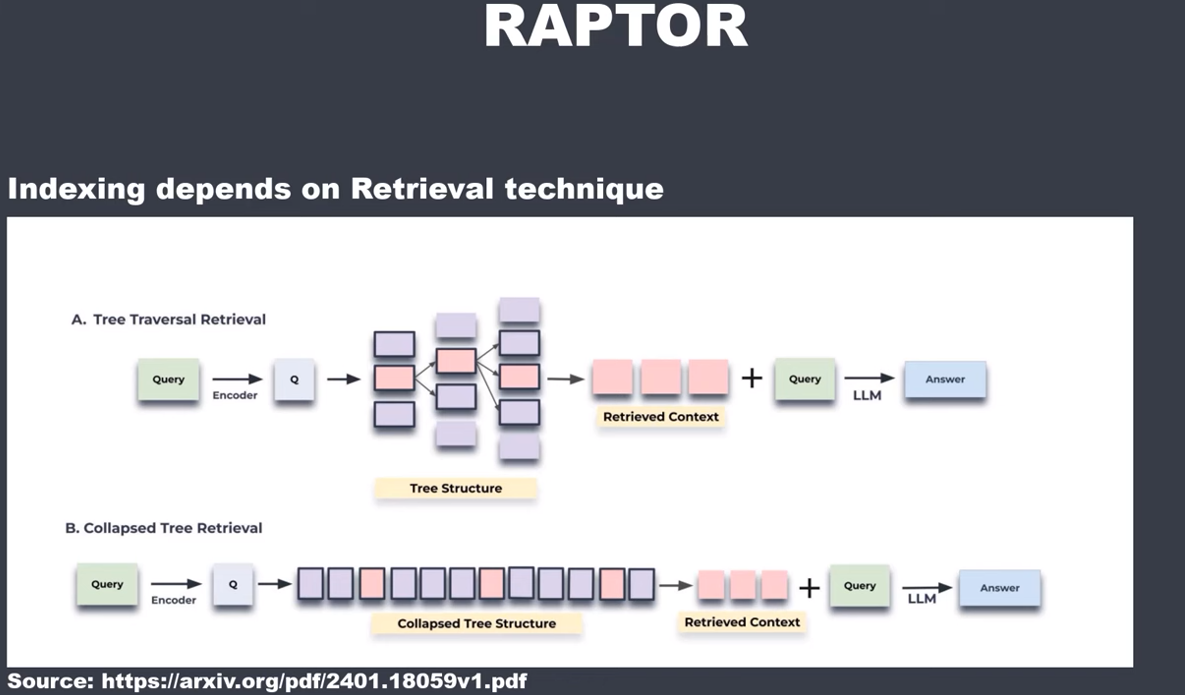

Collapsed Tree Retrieval:

In [38]:
texts_from_df = df['Text'].tolist()
texts_from_clustered_texts = list(clustered_texts.values())
texts_from_final_summaries = list(final_summaries.values())

combined_texts = texts_from_df + texts_from_clustered_texts + texts_from_final_summaries

In [40]:
!pip install -q chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 559.5/559.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 7.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 5

In [41]:
from langchain_community.vectorstores import Chroma

# Now, use all_texts to build the vectorstore with Chroma
vectorstore = Chroma.from_texts(texts=combined_texts, embedding=embedding_model)


In [42]:
def adjust_final_number(string: str, max_threshold: int, initial_number: int) -> int:
    final_number = initial_number
    while final_number < max_threshold:
        retriever = vectorstore.as_retriever(search_kwargs={"k": final_number})
        docs = retriever.get_relevant_documents(string)
        text = "".join([doc.page_content for doc in docs])
        if num_tokens_from_string(text) < max_threshold:
            final_number += 1
        else:
            break
    return final_number

final_number = adjust_final_number("Who is the owner of the restaurant", 10000, 4)


/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


Suggestion => Parallel Processing

In [43]:
final_number

147

In [44]:
retriever = vectorstore.as_retriever(search_kwargs={"k": final_number})

In [45]:
from langchain_core.runnables import RunnablePassthrough

template = """
Answer the question based only on the following context:
{context}

Answer the following question:
Question: {question}
"""
prompt = ChatPromptTemplate.from_template(template)


def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | model
    | StrOutputParser()
)

In [46]:
# Question
rag_chain.invoke("Who is the owner of the restaurant")

'The owner of the restaurant, Bella Vista, is Giovanni Di Napoli. \n'